In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as pl
import math


# Q2
Read `LineDetection.jpg` (the image below)




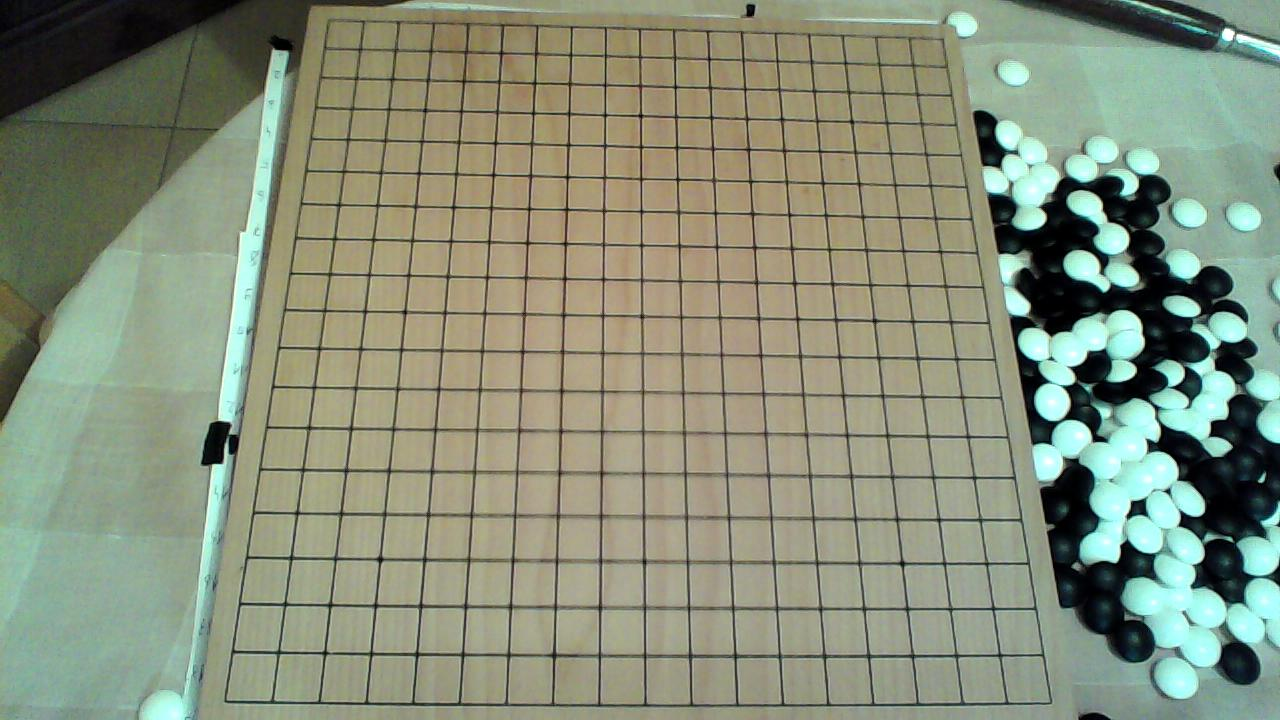

Use Hough to detect lines.

Note that you should consider the `Threshold`!

Here the threshold is `250`


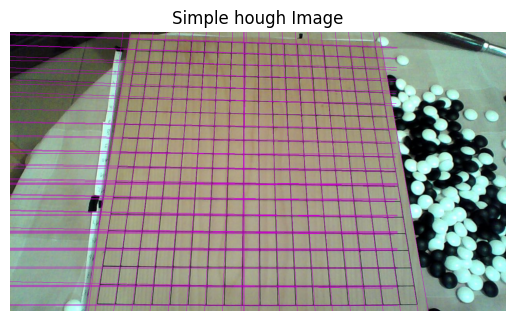

In [2]:
# TODO
# Reference: https://machinelearningknowledge.ai/lane-detection-tutorial-in-opencv-python-using-hough-transform/#Hough_Transform_in_OpenCV_Python

threshold = 250

img = cv2.imread('LineDetection.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

edges = cv2.Canny(img,50,200)
lines = cv2.HoughLines(edges,1,np.pi/180, threshold)

# print(lines[0])

# draw each detected line
for line in lines:
   r,theta=line[0]
   a=np.cos(theta)
   b=np.sin(theta)
   x0=a*r
   y0=b*r
   x1 = int(x0+1000*(-b))
   y1 = int(y0+1000*(a))
   x2 = int(x0-1000*(-b))
   y2 = int(y0-1000*(a))
   cv2.line(img,(x1,y1),(x2,y2),(200,0,205),1)

pl.figure()
pl.title("Simple hough Image")
pl.axis('off')
pl.imshow(img, cmap='bone')



Here is a sample output:

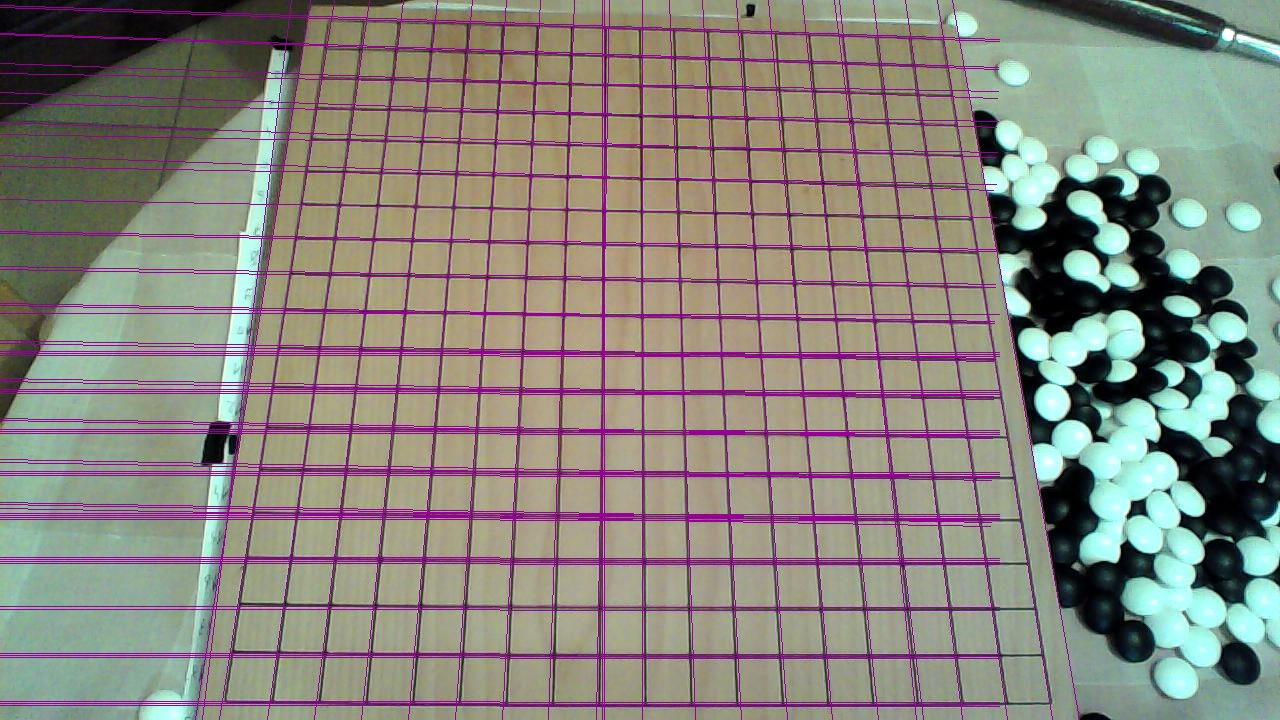

Now use *Probabilistic Hough Transform*. then, apply it to this picture.

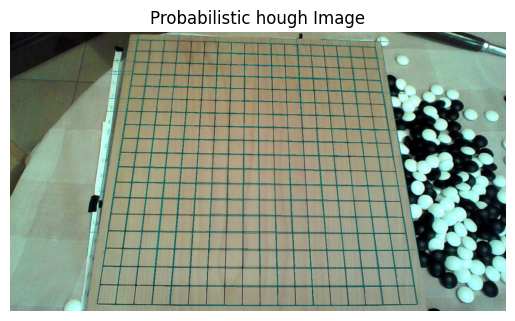

In [3]:
#TODO

img = cv2.imread('LineDetection.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

edges = cv2.Canny(img,70,180)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=150, minLineLength=10, maxLineGap=21)


for line in lines:
    # print(line)
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (5, 120, 110), 1)


pl.figure()
pl.title("Probabilistic hough Image")
pl.axis('off')
pl.imshow(img, cmap='bone')


Here is a sample output (Not the best one): 

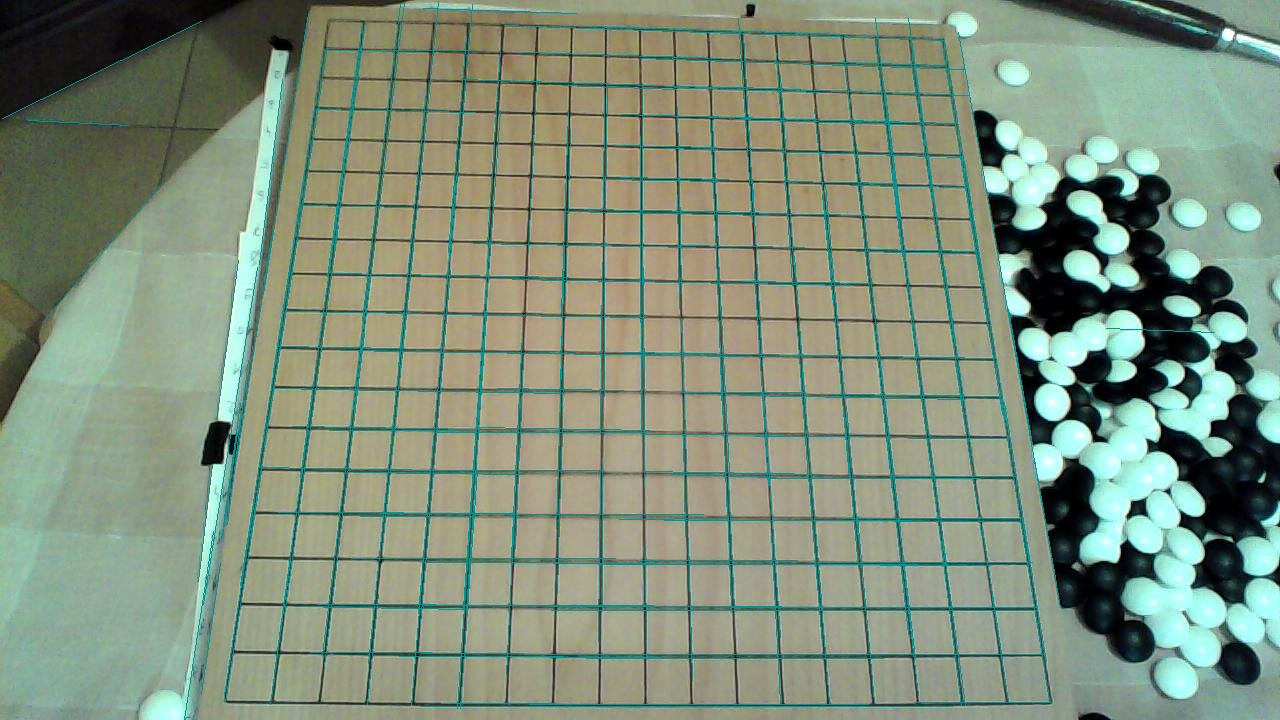

Note that you should find the optimum amount of parameters which are used in this algorithm.

In [6]:

def hough(edges,threshold=250,edge_threshold=200):
    # get index of pixels greater than edge_threshold
    i_ind = []
    j_ind = []
    for i,col in enumerate(edges):
        for j,v in enumerate(col):
            if v > edge_threshold:
                i_ind.append(i)
                j_ind.append(j)

    j_ind = np.array(j_ind)
    i_ind = np.array(i_ind)

    # get the theta and ph for each pixel
    p_list = []
    for i in range(180):
        sin = np.sin(np.pi / 180 * i)
        cos = np.cos(np.pi / 180 * i)

        sin_y = sin*j_ind
        cos_x = cos*i_ind
        p:np.ndarray = sin_y+cos_x
        p=p.view(int)

        l=p.tolist()
        li = [((np.pi / 180 * i),int(p_el)) for p_el in l]
        p_list.extend(li)
    # print("p_list",sin)
    
    # calculate the count of each (theta,ph)
    count={}
    selected_set=set()
    
    for cord in p_list:
        n = count.get(cord,0)
        count[cord]=n+1
        if n==threshold:
            selected_set.add(cord)
    
    selected_l = np.array(list(selected_set))
    return selected_l

    
        
    


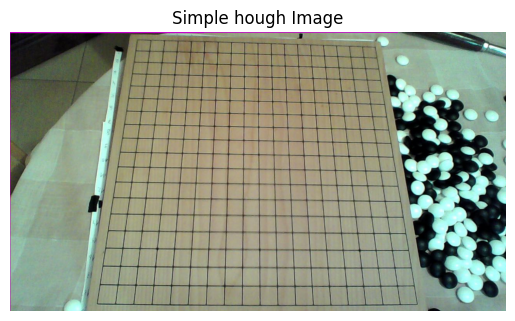

In [7]:
img = cv2.imread('LineDetection.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

edges = cv2.Canny(img,50,200)

lines=hough(edges=edges,threshold=threshold,edge_threshold=100)
# draw each detected line
for line in lines:
   theta,r=line
   a=np.cos(theta)
   b=np.sin(theta)
   x0=a*r
   y0=b*r
   x1 = int(x0+1000*(-b))
   y1 = int(y0+1000*(a))
   x2 = int(x0-1000*(-b))
   y2 = int(y0-1000*(a))
   cv2.line(img,(x1,y1),(x2,y2),(200,0,205),1)

pl.figure()
pl.title("Simple hough Image")
pl.axis('off')
pl.imshow(img, cmap='bone')

In [8]:
print(lines)

[[ 0.00000000e+00  1.08252160e+09]
 [ 5.23598776e-01  2.14307346e+09]
 [ 0.00000000e+00  1.08222874e+09]
 [ 0.00000000e+00  1.08242125e+09]
 [ 5.23598776e-01  1.60151751e+09]
 [ 5.23598776e-01 -1.66821371e+09]
 [ 0.00000000e+00  1.08214272e+09]
 [ 5.23598776e-01  5.70493859e+08]
 [ 5.23598776e-01 -4.60529796e+08]
 [ 1.04719755e+00  2.13149830e+09]
 [ 5.23598776e-01 -2.83869534e+08]
 [ 5.23598776e-01 -1.12087018e+09]
 [ 0.00000000e+00  1.08252774e+09]
 [ 1.57079633e+00  1.08231885e+09]
 [ 1.57079633e+00  1.00000000e+00]
 [ 0.00000000e+00  1.08213453e+09]
 [ 1.57079633e+00  1.08239667e+09]
 [ 0.00000000e+00  1.08251955e+09]
 [ 5.23598776e-01  1.07153673e+09]
 [ 5.23598776e-01 -9.56341080e+07]
 [ 0.00000000e+00  1.08131942e+09]
 [ 5.23598776e-01  2.17173337e+08]
 [ 5.23598776e-01 -3.07019864e+08]
 [ 5.23598776e-01 -6.37190056e+08]
 [ 1.04719755e+00  6.94509880e+07]
 [ 0.00000000e+00  1.08223283e+09]
 [ 5.23598776e-01  7.47154120e+08]
 [ 5.23598776e-01 -1.68557646e+09]
 [ 0.00000000e+00  1

# Q3

What does this cell of code do? Explain the algorithm.

Then Compare it with the results of the previous part.

In [9]:
img = cv2.imread("LineDetection.jpg",0)
imgcolorous = cv2.imread('LineDetection.jpg')
UNKNOWN = cv2.createLineSegmentDetector(0)
lines = UNKNOWN.detect(img)[0]
drawn_img = UNKNOWN.drawSegments(imgcolorous,lines)
cv2.imwrite('UNKNOWN.jpg',drawn_img)

True

# Q4

In the cells below you should define two functions that one of them covert RGB to CMYK and another one Convert them vice versa. 

In [10]:
def rgb_to_cmyk(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  #TODO
  r /= RGB_SCALE
  g /= RGB_SCALE
  b /= RGB_SCALE
  
  k = 1 - max(r, g, b)
  kr = 1 - k
  # print(kr , g)
  c = int((kr - r)* CMYK_SCALE/kr )
  m = int((kr - g)* CMYK_SCALE/kr )
  y = int((kr - b) * CMYK_SCALE/kr )
  k = int(k * CMYK_SCALE )



  return c, m, y, k

In [11]:
rgb_to_cmyk(25, 56, 25)

(55, 0, 55, 78)

Expected Output: (55, 0, 55, 78)

In [12]:
def cmyk_to_rgb(c, m, y, k, CMYK_SCALE = 100, RGB_SCALE = 255):

  #TODO
  c/=CMYK_SCALE
  m/=CMYK_SCALE
  y/=CMYK_SCALE
  k/=CMYK_SCALE

  r = int(255*(1-c)*(1-k))
  g = int(255*(1-m)*(1-k))
  b = int(255*(1-y)*(1-k))

  return r, g, b

In [13]:
cmyk_to_rgb(55, 0, 55, 78)

(25, 56, 25)

Expected Output: (25, 56, 25)

# Q5
Compute the HSI parametes and V, L and Y according to lectures.

In [14]:
#TODO 
b, g, r = (200, 65, 150)


theta = math.acos(
    (r-g + r-b)/(2*math.sqrt((r-g)**2 +(r-b)*(g-b)))
)

H = theta if b<= g else 2*math.pi - theta
S = 1-(3*min(b,g,r))/(b+g+r)
I = (r+g+b)/3

V = max( b, r,g)
L = (max(b, r,g) + min(b,r,g)) / 2

# reference: https://sistenix.com/rgb2ycbcr.html
Y = 16 +(65.7 * r/255)+(129 * g/255)+(25*b/255)

# H = ...
print(f"theta:{theta}\nH={H} \nS:{S}\nI:{I}\nV:{V}\nL:{L}\nY:{Y}")

theta:1.422216023754124
H=4.8609692834254625 
S:0.5301204819277108
I:138.33333333333334
V:200
L:132.5
Y:107.13725490196079


# Good Luck!